# Importing libraries

In [190]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [191]:
df = pd.read_csv("./heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [192]:
df.shape

(920, 16)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# EDA

In [194]:
# Check data types
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [195]:
# Check column types
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['id', 'age', 'num'], float64: ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], object: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']}

In [196]:
# Check unique values
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [197]:
# change the categorical type to categorical variables
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [198]:
# check null values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [199]:
df.thal.unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [200]:
df.thal.value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [201]:
# Deleting rows or columns not needed for the analysis.

In [202]:
# change the labelling for better interpretation/ visualization understanding
# df['restecg'] = df.num.replace({1: "lv hypertrophy", 1: "normal", 2: "st-t abnormality" })
df['num'] = df.num.replace({1: "Disease", 0: "No_disease", 2: "Pred Classf 1", 3: "Pred Classf 2", 4: "Pred Classf 3"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 2: "atypical_angina", 3:"non-anginal pain", 4: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['slope'] = df.cp.replace({1: "upsloping", 2: "flat", 3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [203]:
# to know the basic stats
df.describe()

,id,age,trestbps,chol,thalch,oldpeak
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000


In [204]:
# Check for missing values and replace them
df.fillna(method='ffill', inplace=True)  # Forward fill missing values
df

/var/folders/9r/wnc9gnyj61n5rkt3c6yzg16c0000gn/T/ipykernel_28390/2074591690.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,No,2.3,typical angina,0.0,fixed defect,No_disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,Yes,1.5,asymptomatic,3.0,normal,Pred Classf 1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,Yes,2.6,asymptomatic,2.0,reversable defect,Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,No,3.5,non-anginal,0.0,normal,No_disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,No,1.4,atypical angina,0.0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,No,0.0,asymptomatic,0.0,normal,Disease
916,917,62,Male,VA Long Beach,typical angina,127.0,139.0,False,st-t abnormality,154.0,No,0.0,typical angina,0.0,normal,No_disease
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,No,0.0,asymptomatic,0.0,fixed defect,Pred Classf 1
918,919,58,Male,VA Long Beach,asymptomatic,122.0,385.0,True,lv hypertrophy,100.0,No,0.0,asymptomatic,0.0,fixed defect,No_disease


In [205]:
# Check for duplicate rows
df.drop_duplicates(inplace=True)
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,No,2.3,typical angina,0.0,fixed defect,No_disease
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,Yes,1.5,asymptomatic,3.0,normal,Pred Classf 1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,Yes,2.6,asymptomatic,2.0,reversable defect,Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,No,3.5,non-anginal,0.0,normal,No_disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,No,1.4,atypical angina,0.0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,No,0.0,asymptomatic,0.0,normal,Disease
916,917,62,Male,VA Long Beach,typical angina,127.0,139.0,False,st-t abnormality,154.0,No,0.0,typical angina,0.0,normal,No_disease
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,No,0.0,asymptomatic,0.0,fixed defect,Pred Classf 1
918,919,58,Male,VA Long Beach,asymptomatic,122.0,385.0,True,lv hypertrophy,100.0,No,0.0,asymptomatic,0.0,fixed defect,No_disease


In [206]:
# Statistics summary
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.402174,201.026087,136.648913,0.896957,0.503261
std,265.725422,9.424685,18.965153,110.746323,25.889604,1.097267,0.773606
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.000000,119.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,139.500000,0.500000,0.000000
75%,690.250000,60.000000,142.000000,268.250000,156.000000,1.500000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


In [207]:
# Outliers and how to remove them
from scipy.stats import zscore

numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
outliers_mask = (z_scores < 3).all(axis=1)  # Adjust the threshold as needed (e.g., 3)

df = df[outliers_mask]
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,No,2.3,typical angina,0.0,fixed defect,No_disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,Yes,2.6,asymptomatic,2.0,reversable defect,Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,No,3.5,non-anginal,0.0,normal,No_disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,No,1.4,atypical angina,0.0,normal,No_disease
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,No,0.8,atypical angina,0.0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,No,0.0,asymptomatic,0.0,normal,Disease
916,917,62,Male,VA Long Beach,typical angina,127.0,139.0,False,st-t abnormality,154.0,No,0.0,typical angina,0.0,normal,No_disease
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,No,0.0,asymptomatic,0.0,fixed defect,Pred Classf 1
918,919,58,Male,VA Long Beach,asymptomatic,122.0,385.0,True,lv hypertrophy,100.0,No,0.0,asymptomatic,0.0,fixed defect,No_disease


In [208]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [209]:
df.shape

(884, 16)

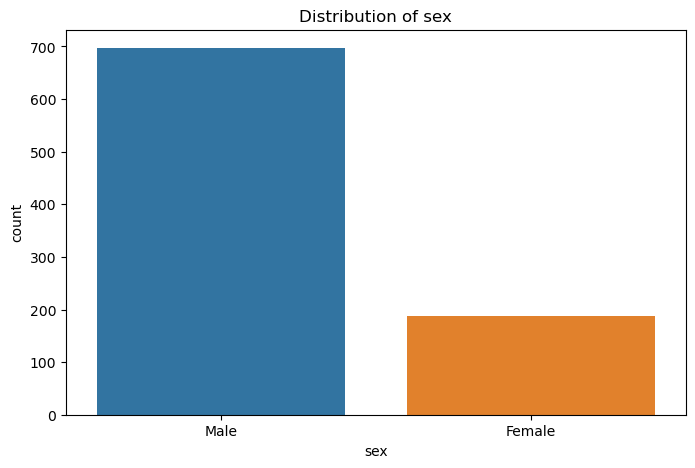

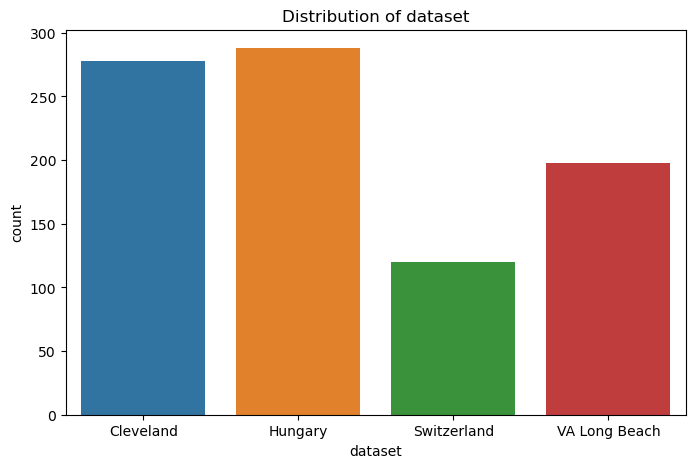

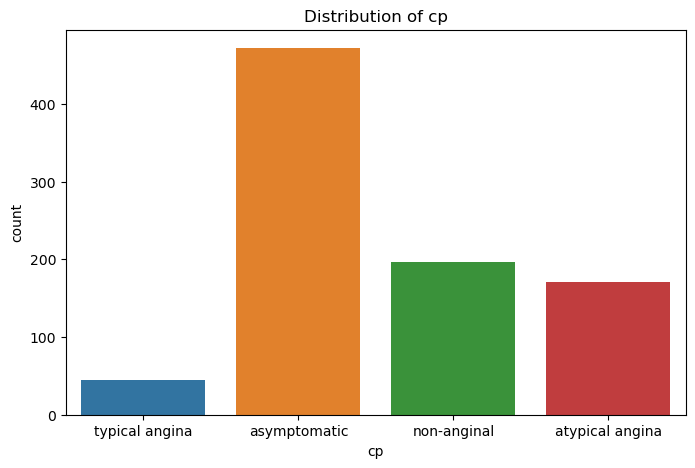

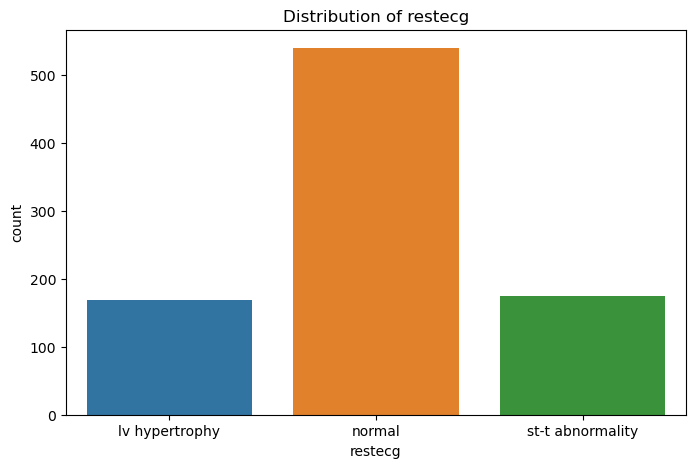

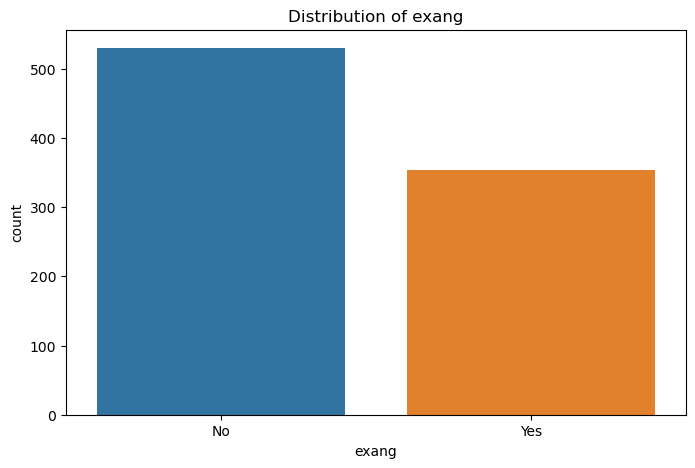

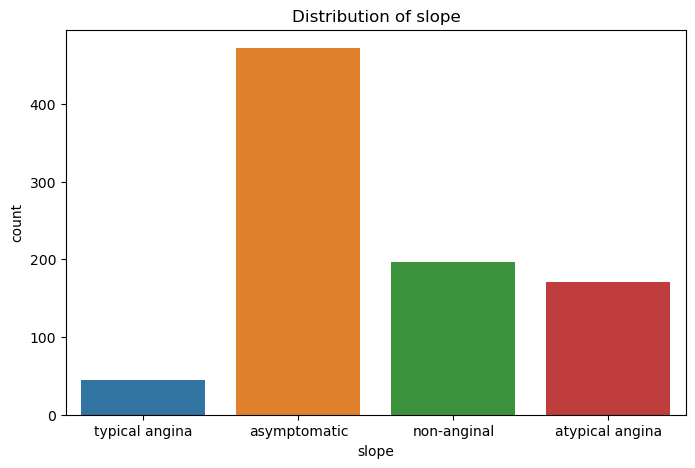

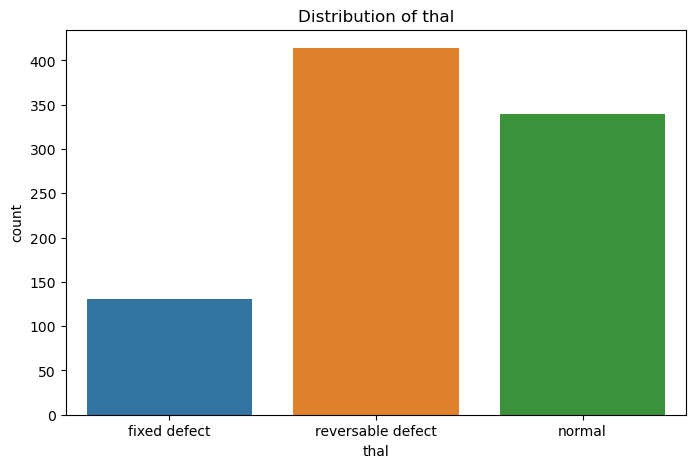

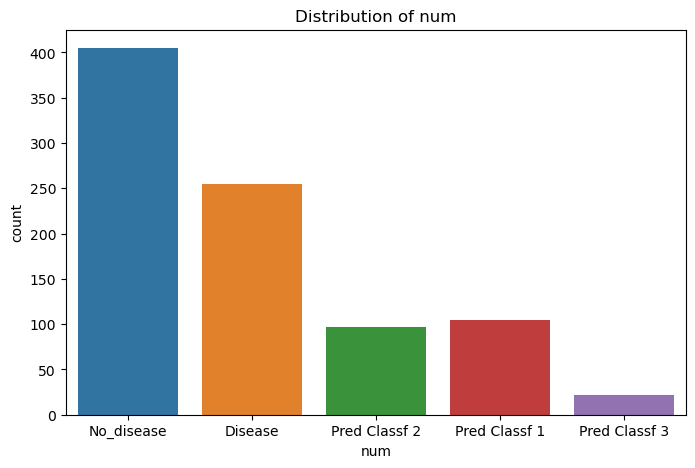

In [210]:
# Categorical variable distribution
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

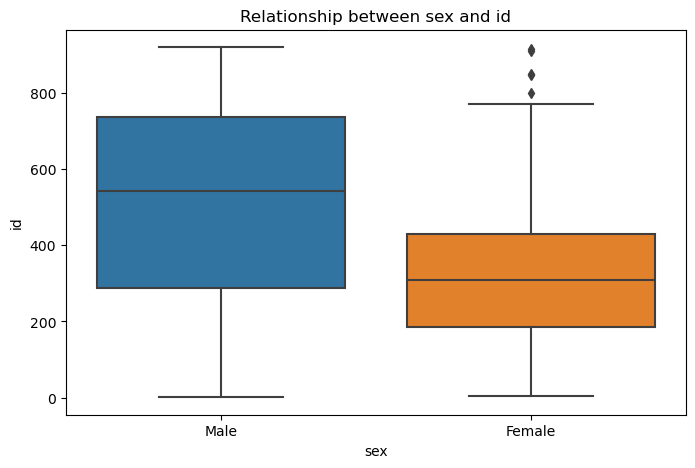

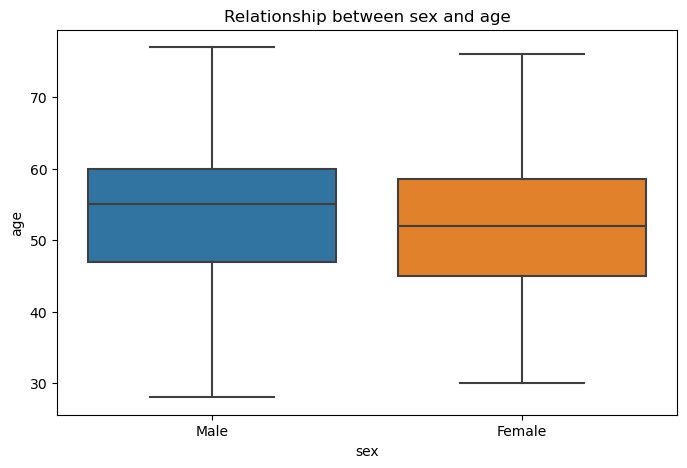

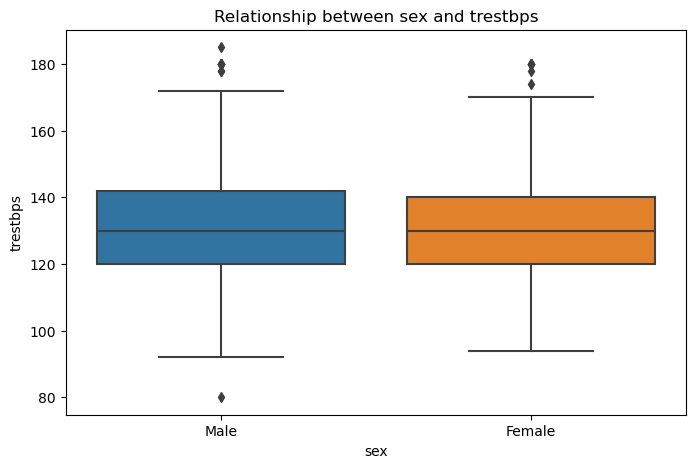

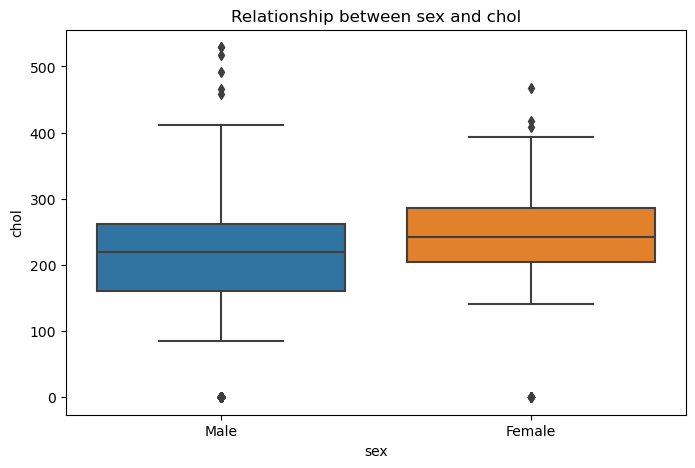

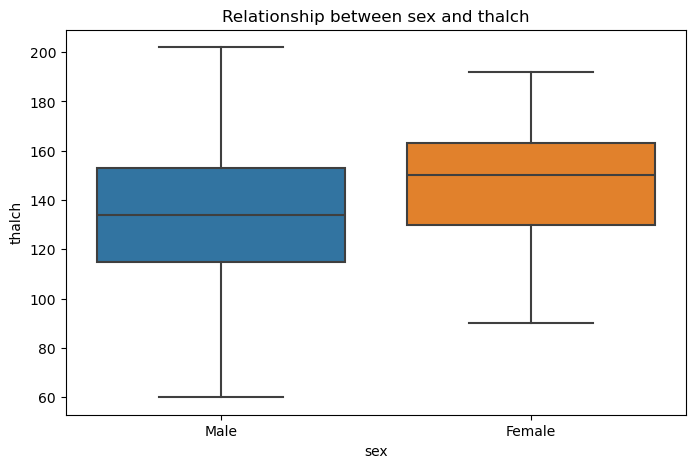

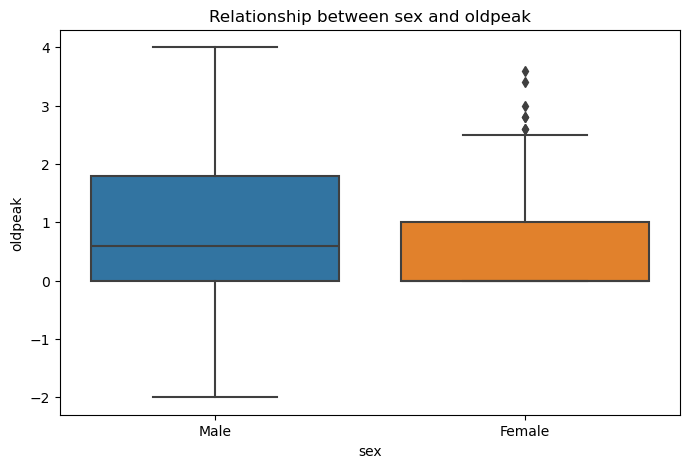

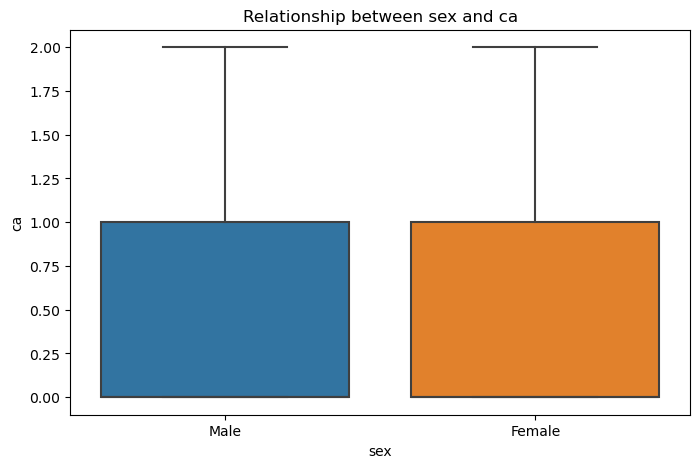

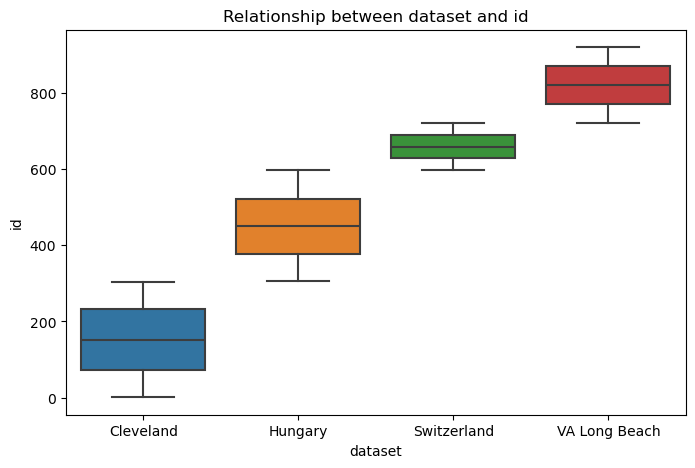

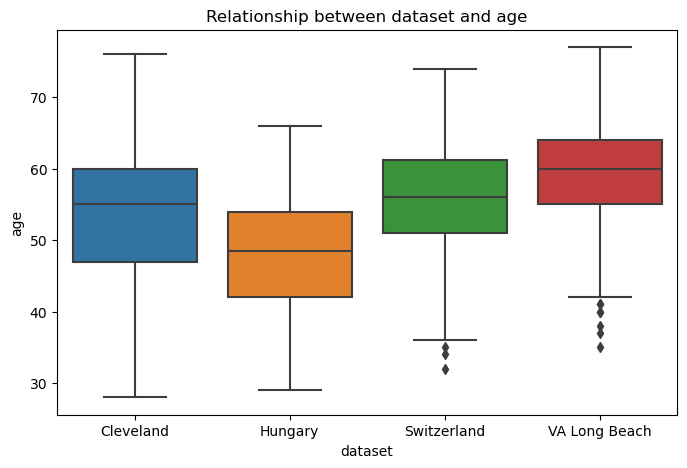

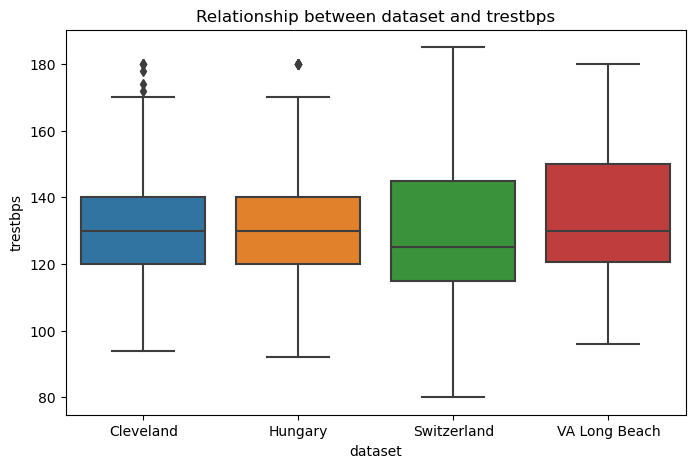

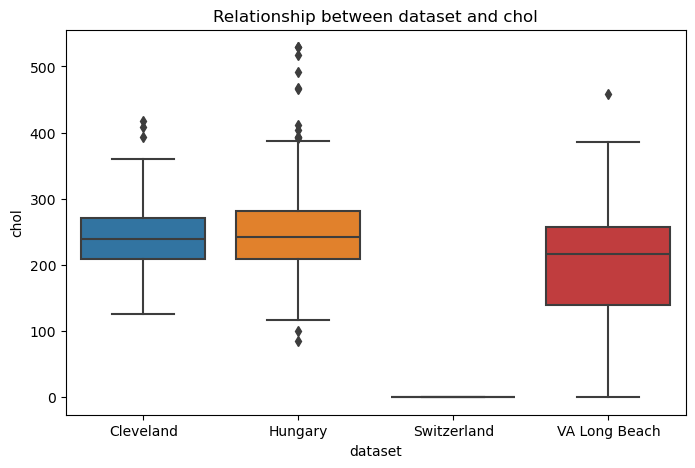

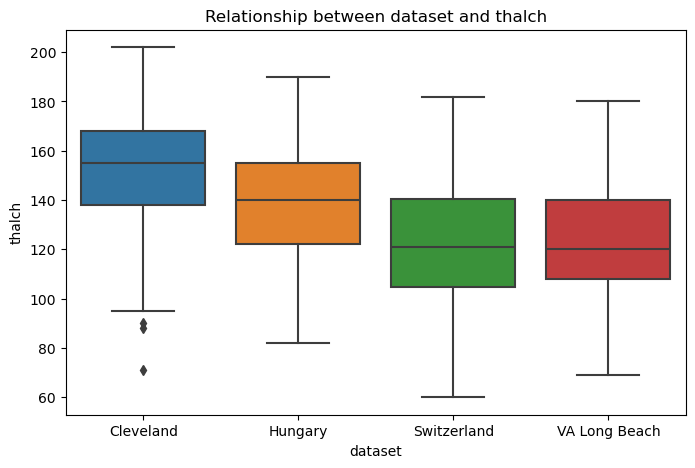

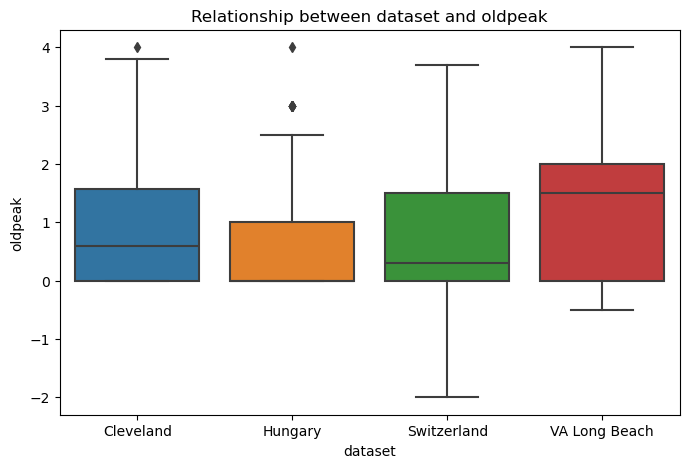

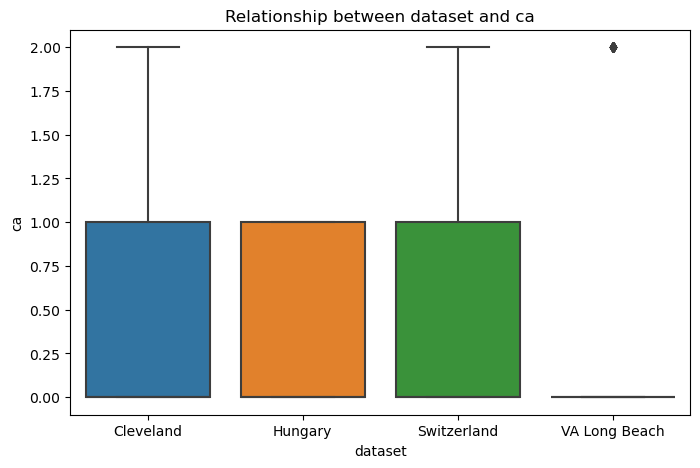

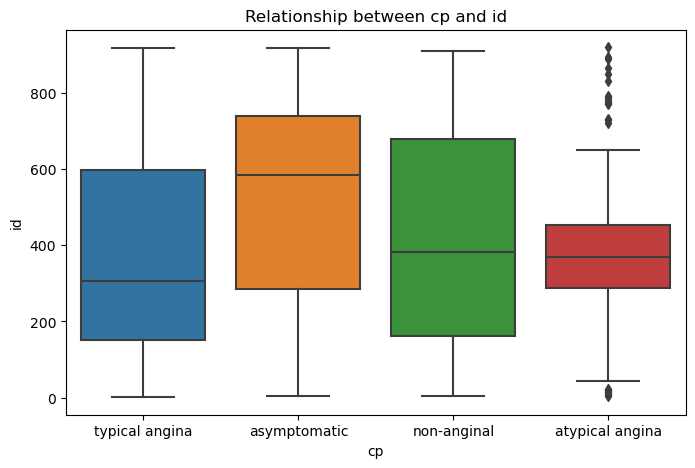

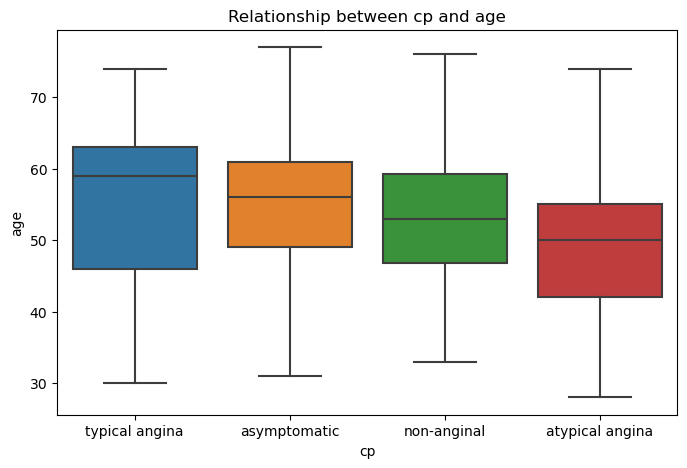

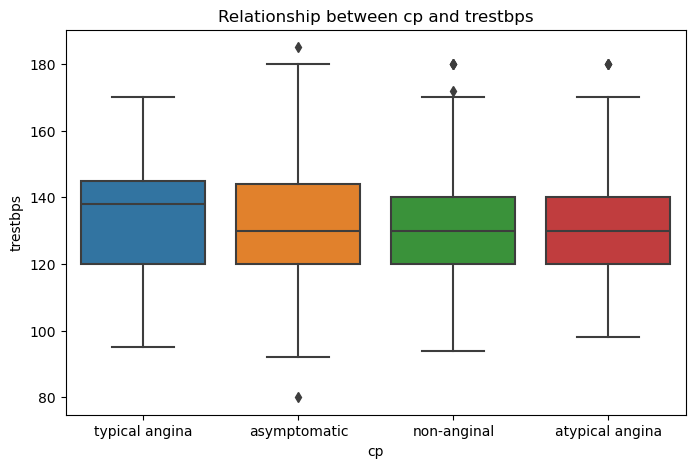

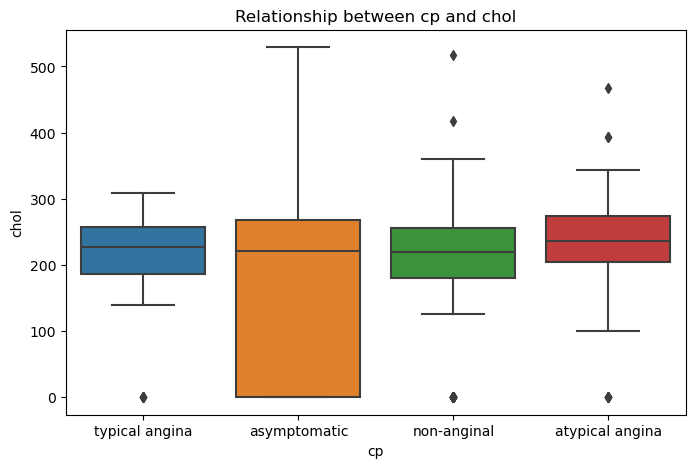

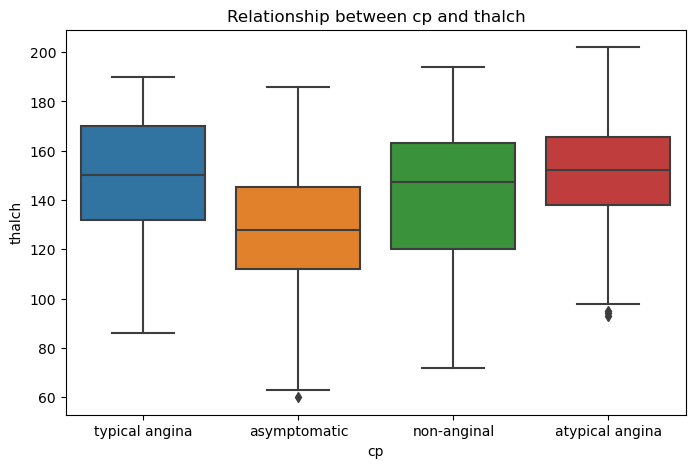

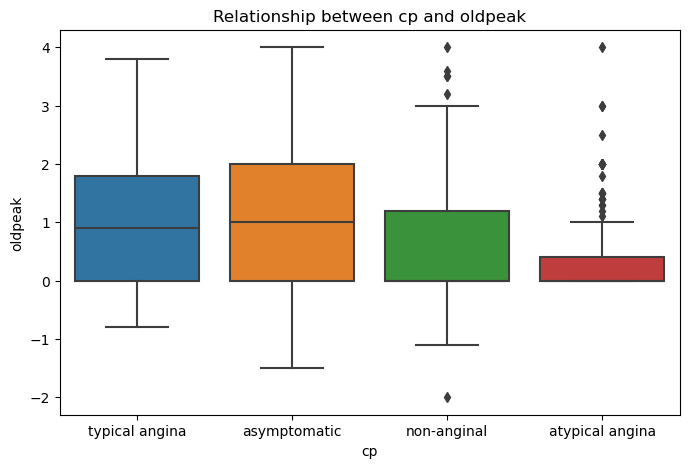

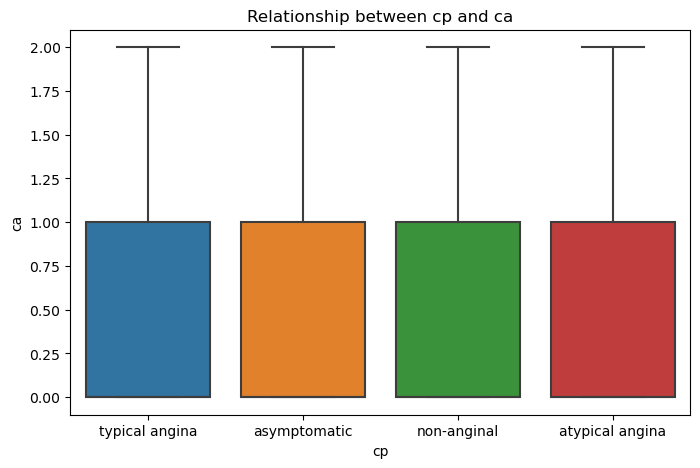

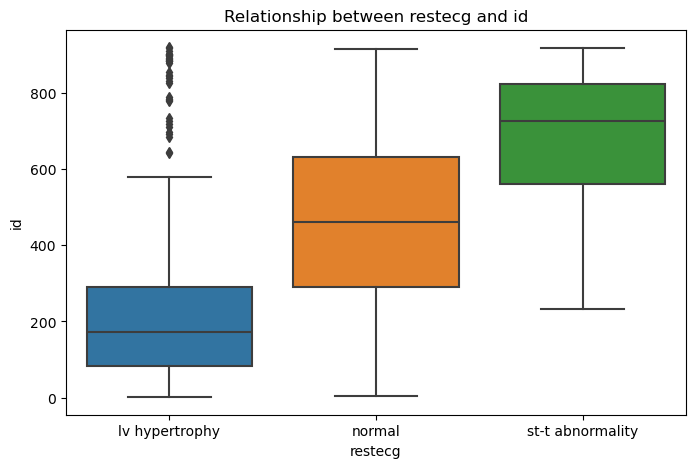

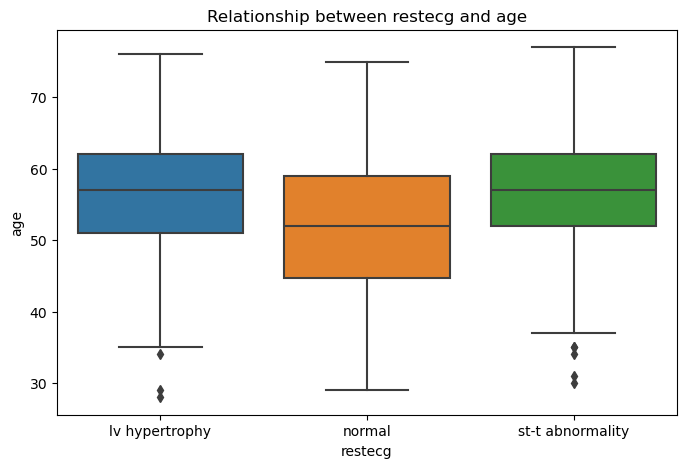

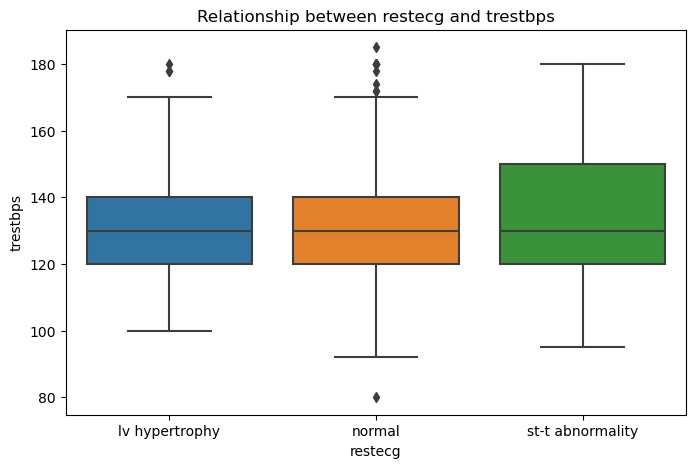

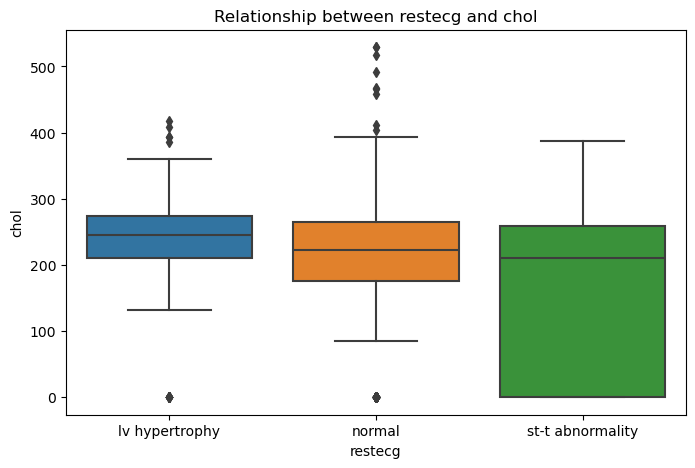

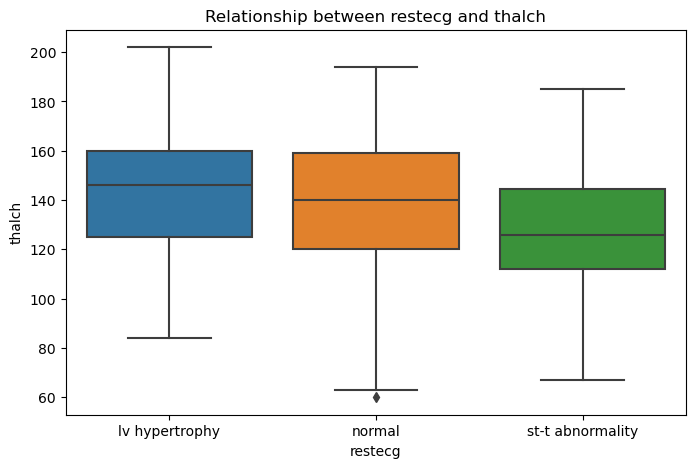

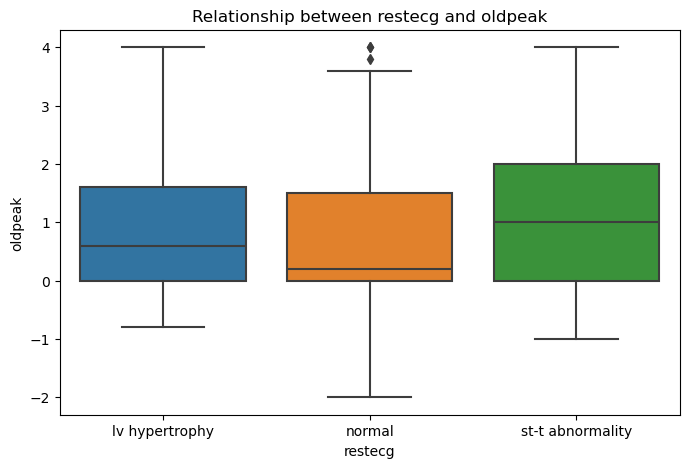

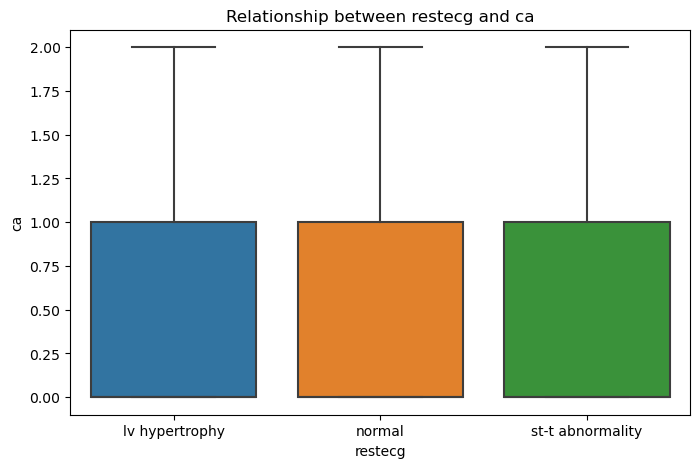

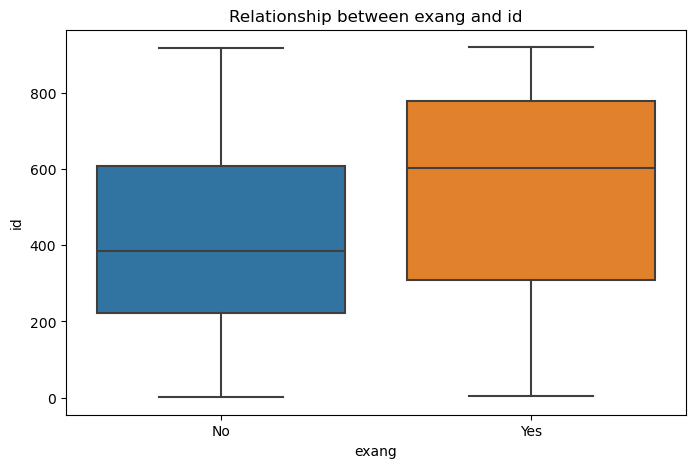

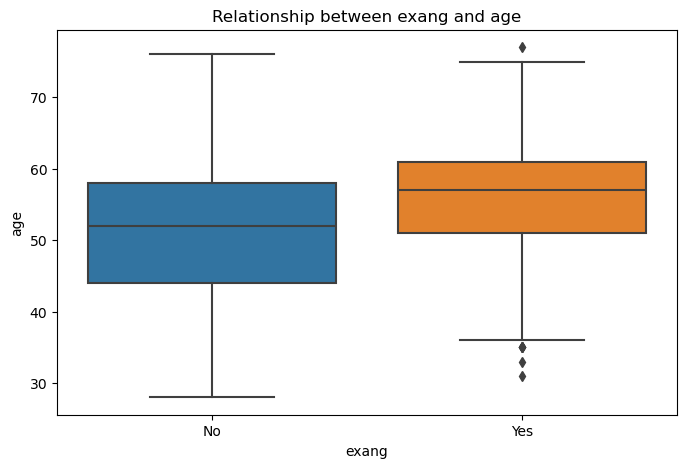

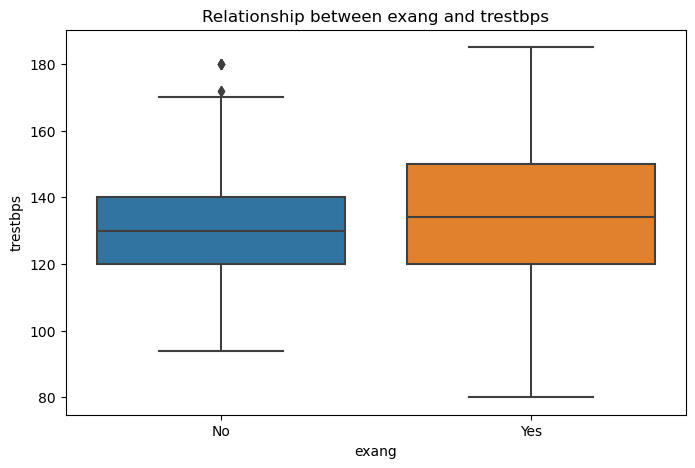

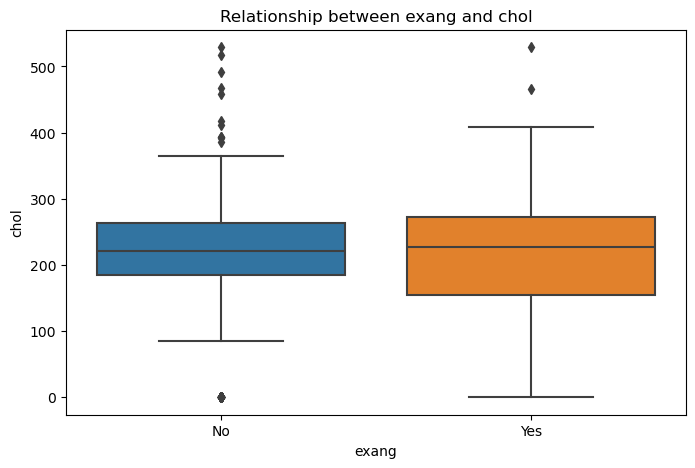

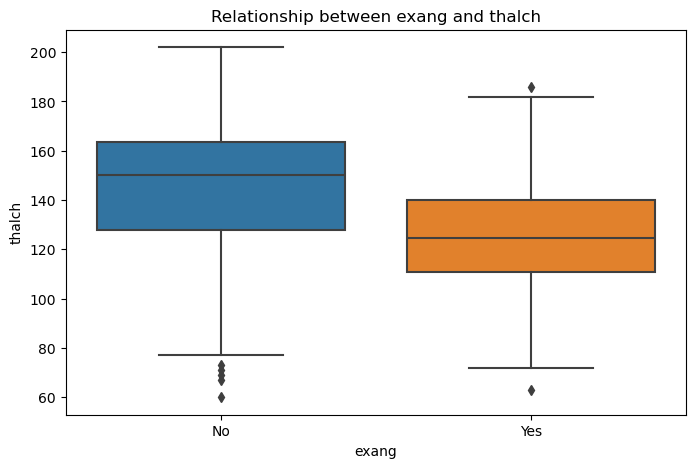

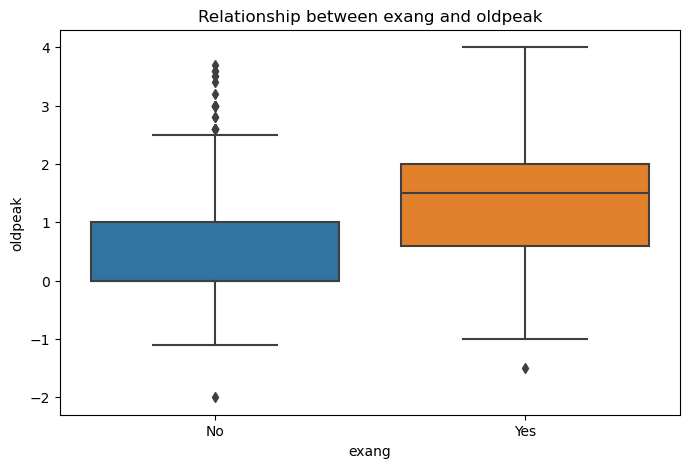

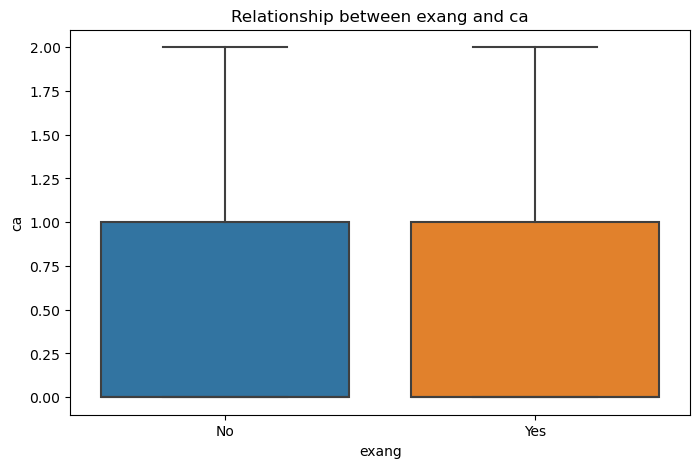

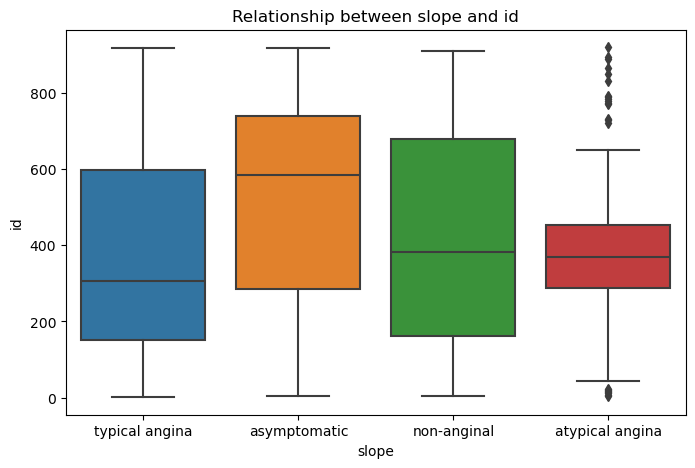

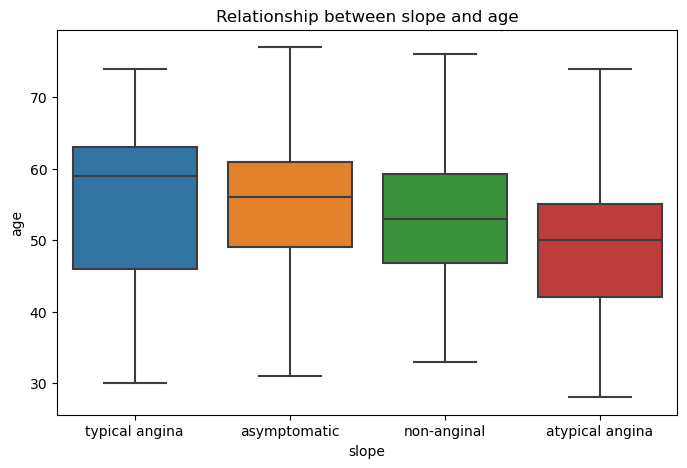

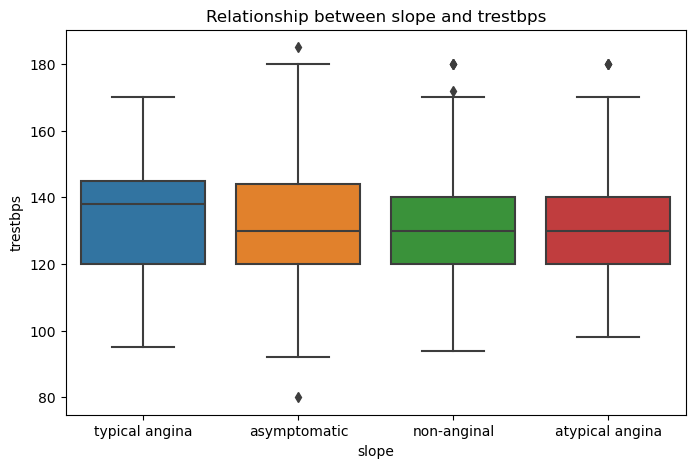

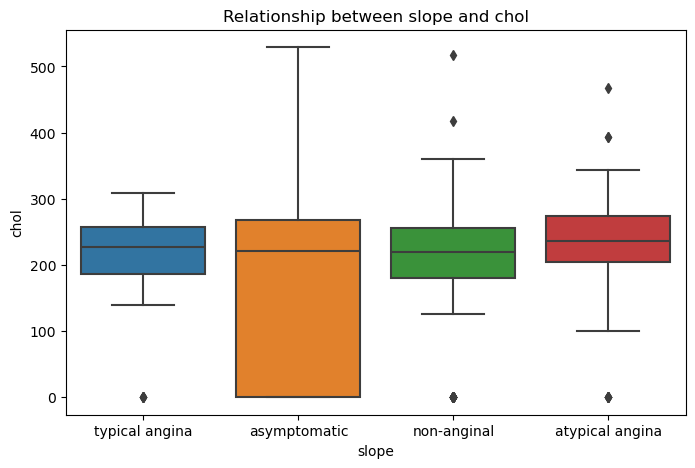

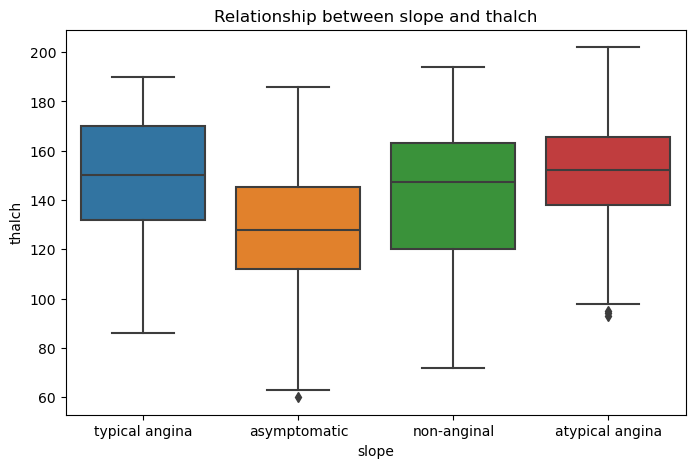

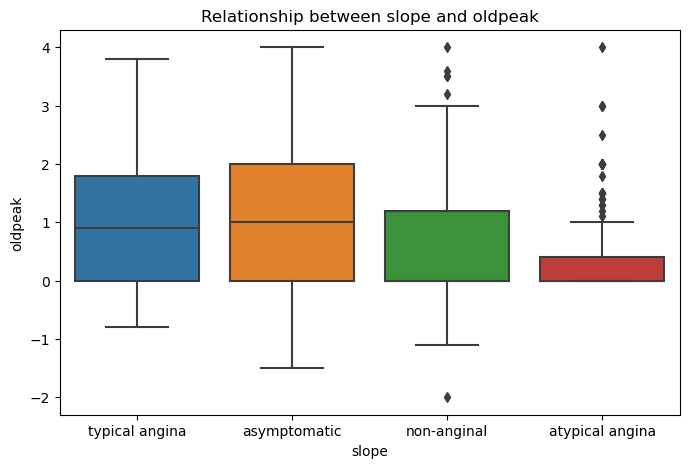

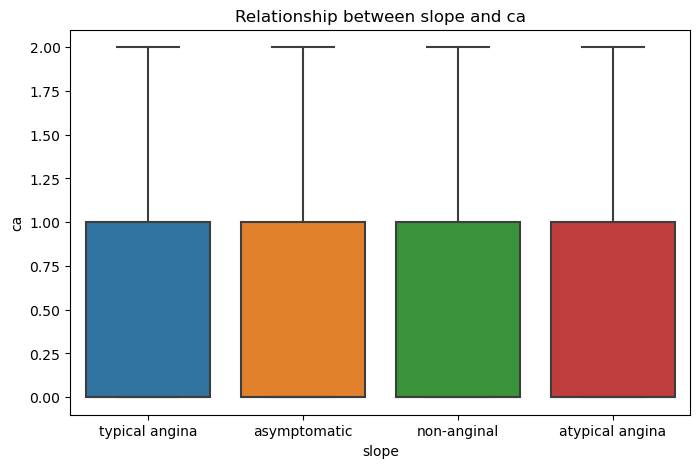

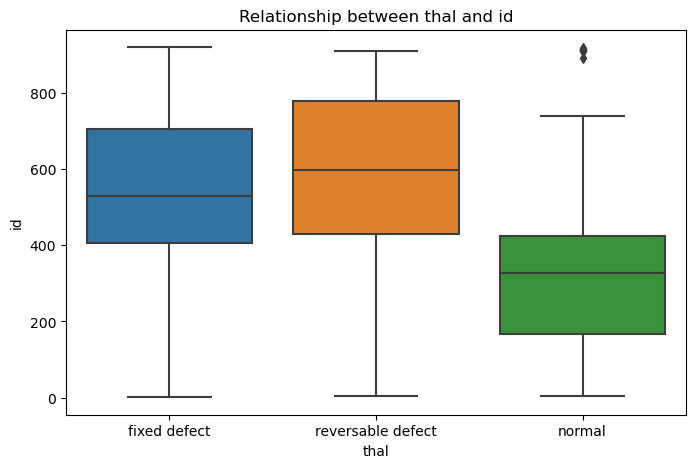

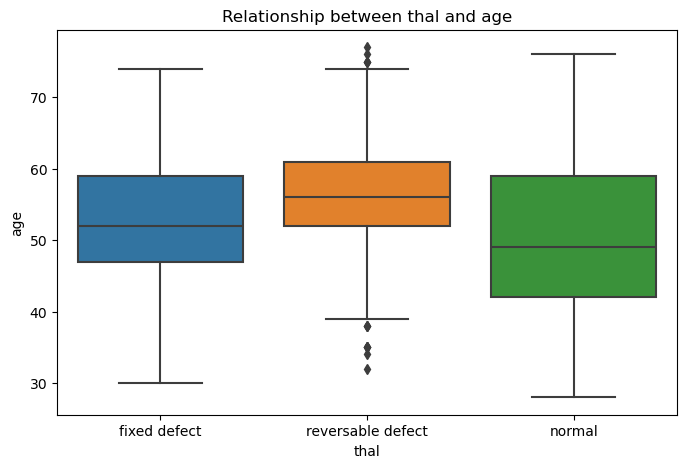

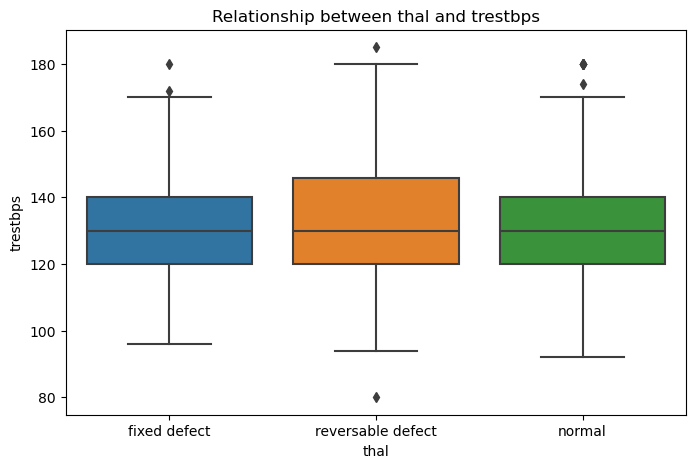

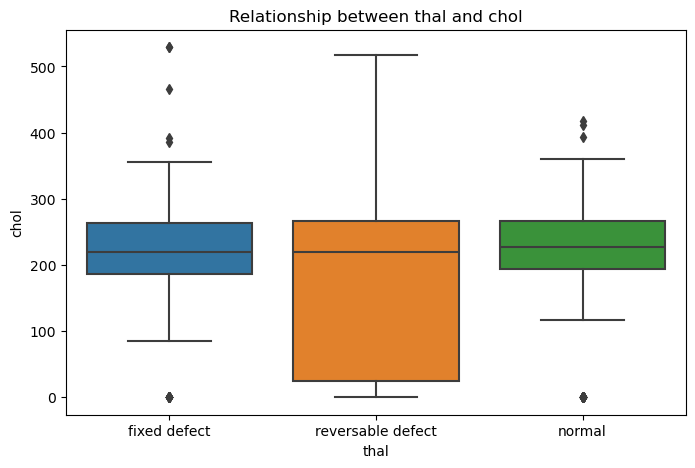

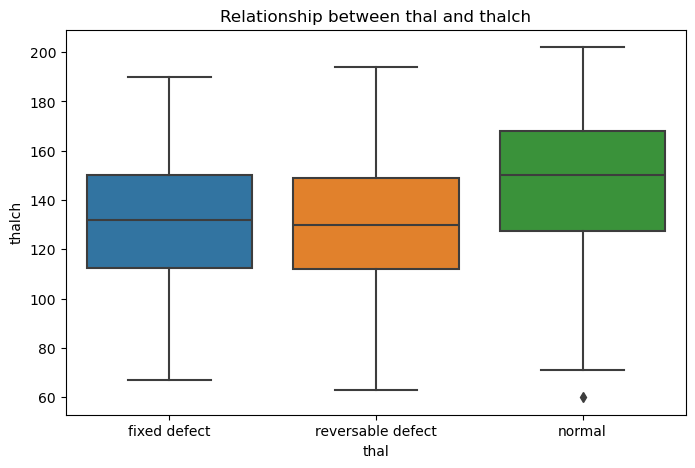

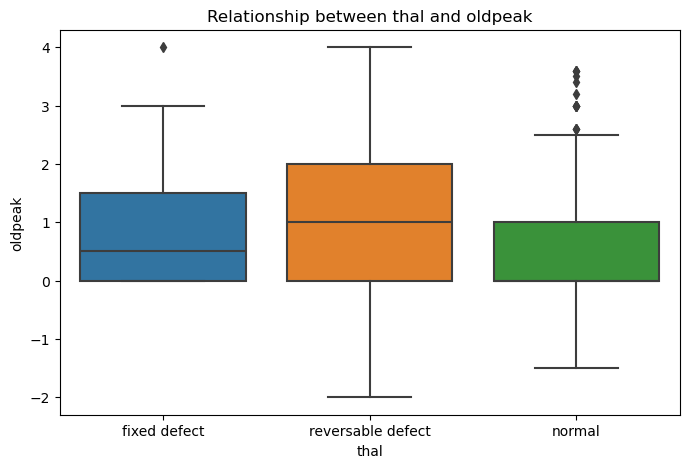

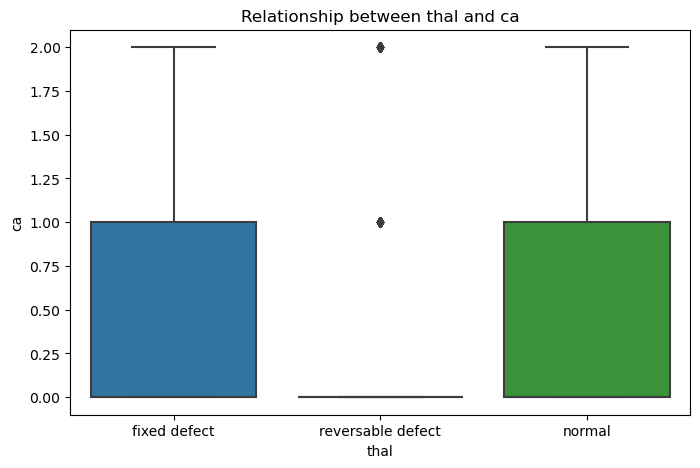

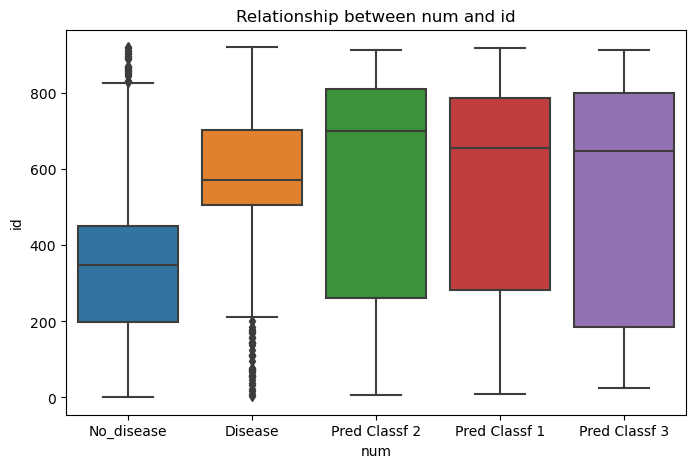

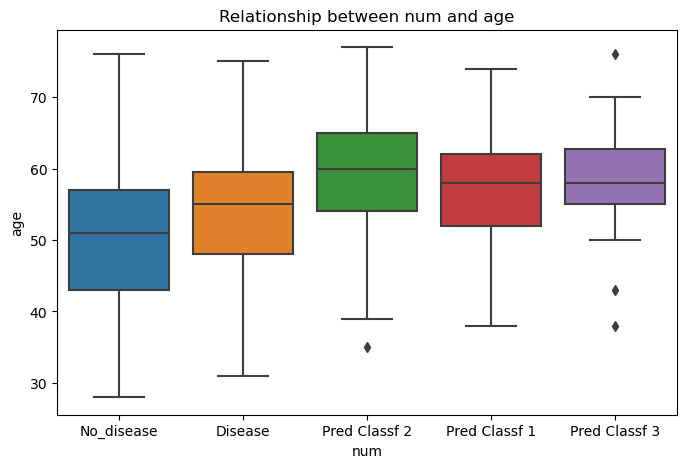

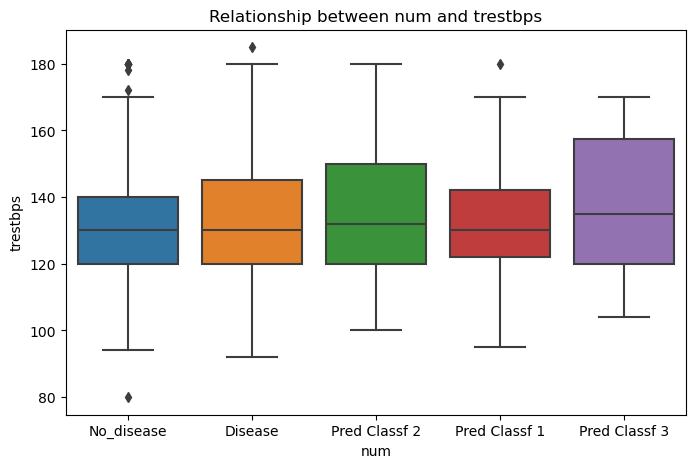

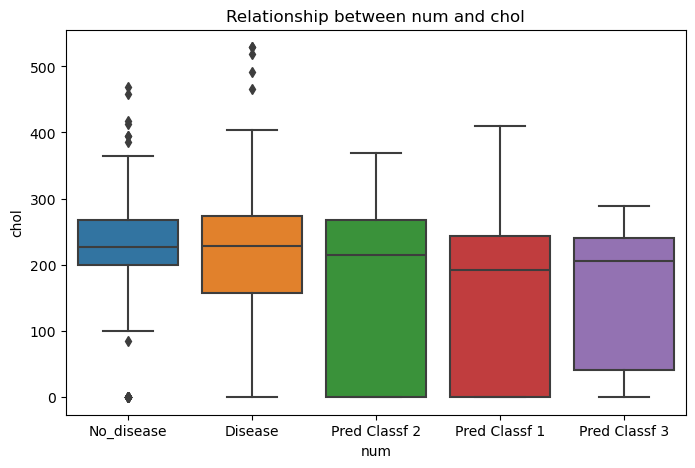

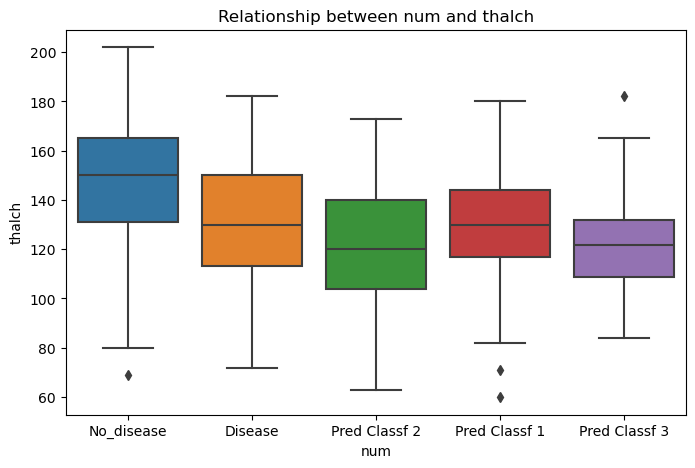

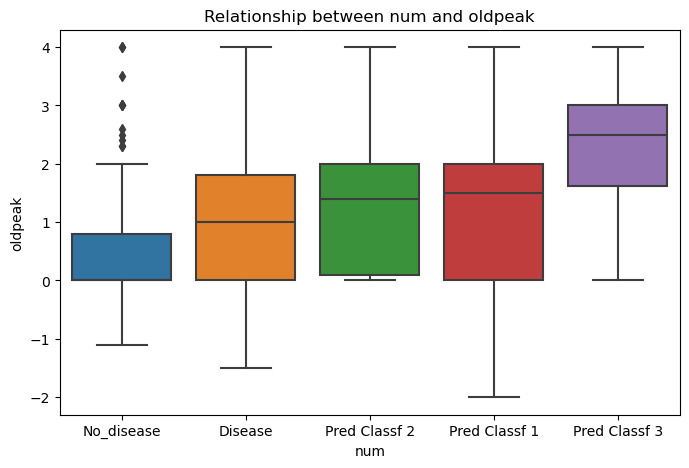

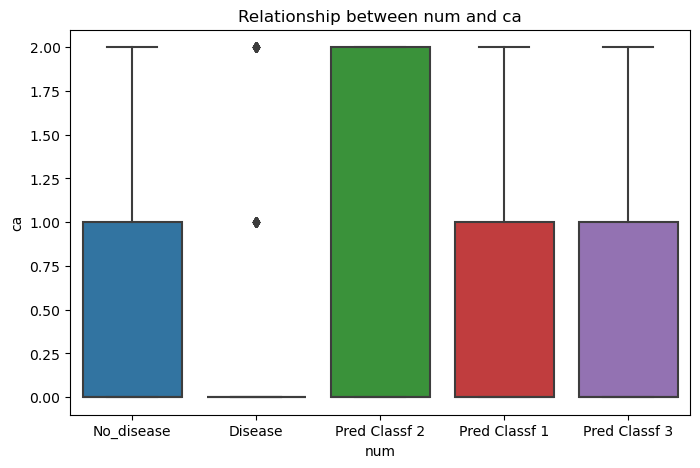

In [211]:
# Relationship between categorical and continuous variables
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

for cat_column in categorical_columns:
    for num_column in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Relationship between {cat_column} and {num_column}')
        plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

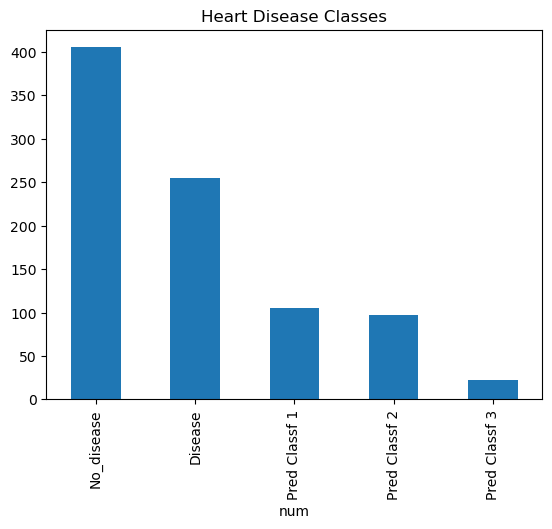

In [212]:
# Target variable distribution
df['num'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

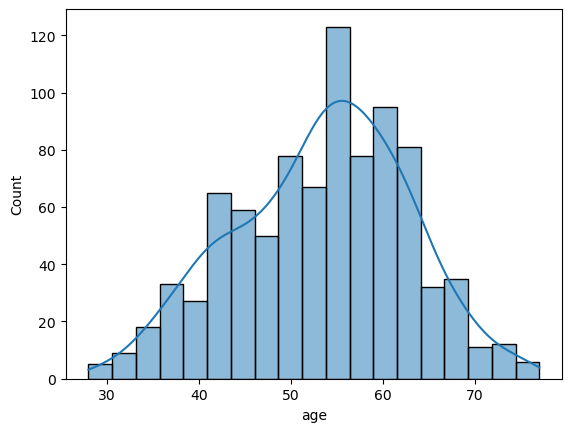

In [213]:
# Age variable distribution
sns.histplot(df['age'], kde=True)

Text(0, 0.5, 'Age distribution')

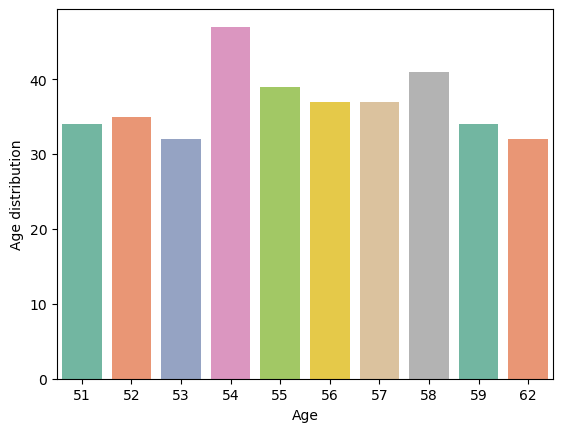

In [214]:
# Analyze distribution in age in range 10
sns.barplot(x=df.age.value_counts()[:10].index,
            y=df.age.value_counts()[:10].values,
            palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

In [215]:
# to know the youngest or oldest in age
df['age'].describe()

count    884.000000
mean      53.348416
std        9.438763
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

sex
Male      697
Female    187
Name: count, dtype: int64


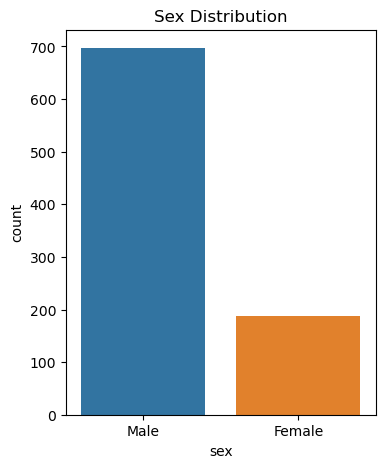

In [216]:
# Gender distribution according target variable
print(df.sex.value_counts())
plt.figure(figsize=(4,5))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

cp
asymptomatic       472
non-anginal        196
atypical angina    171
typical angina      45
Name: count, dtype: int64


<Axes: xlabel='cp', ylabel='count'>

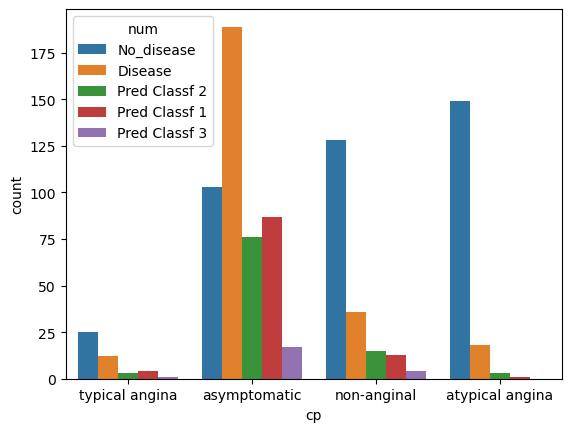

In [217]:
# Chest pain distribution according to the target variable
print(df.cp.value_counts())
sns.countplot(x='cp', hue='num', data=df)

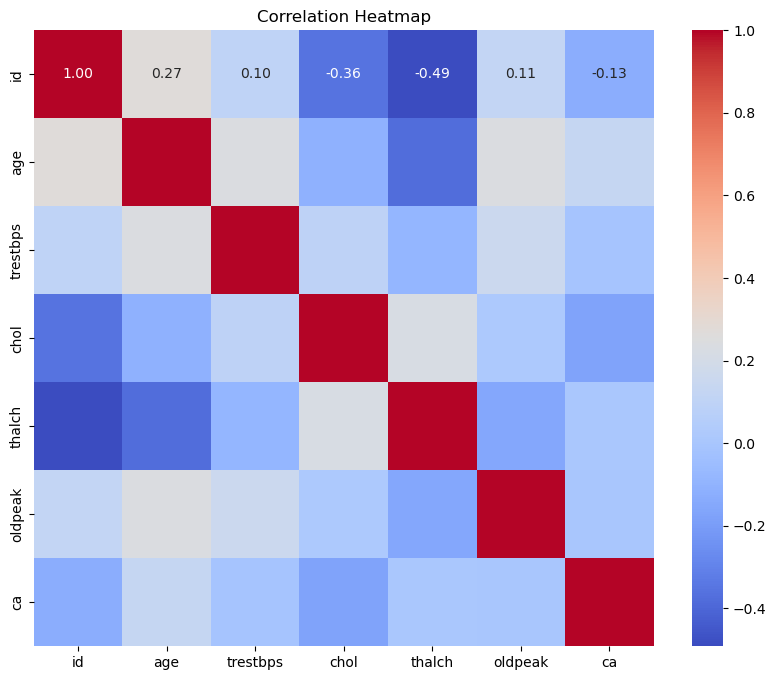

In [218]:
# Draw correlation using Pearson's Heat-map.
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

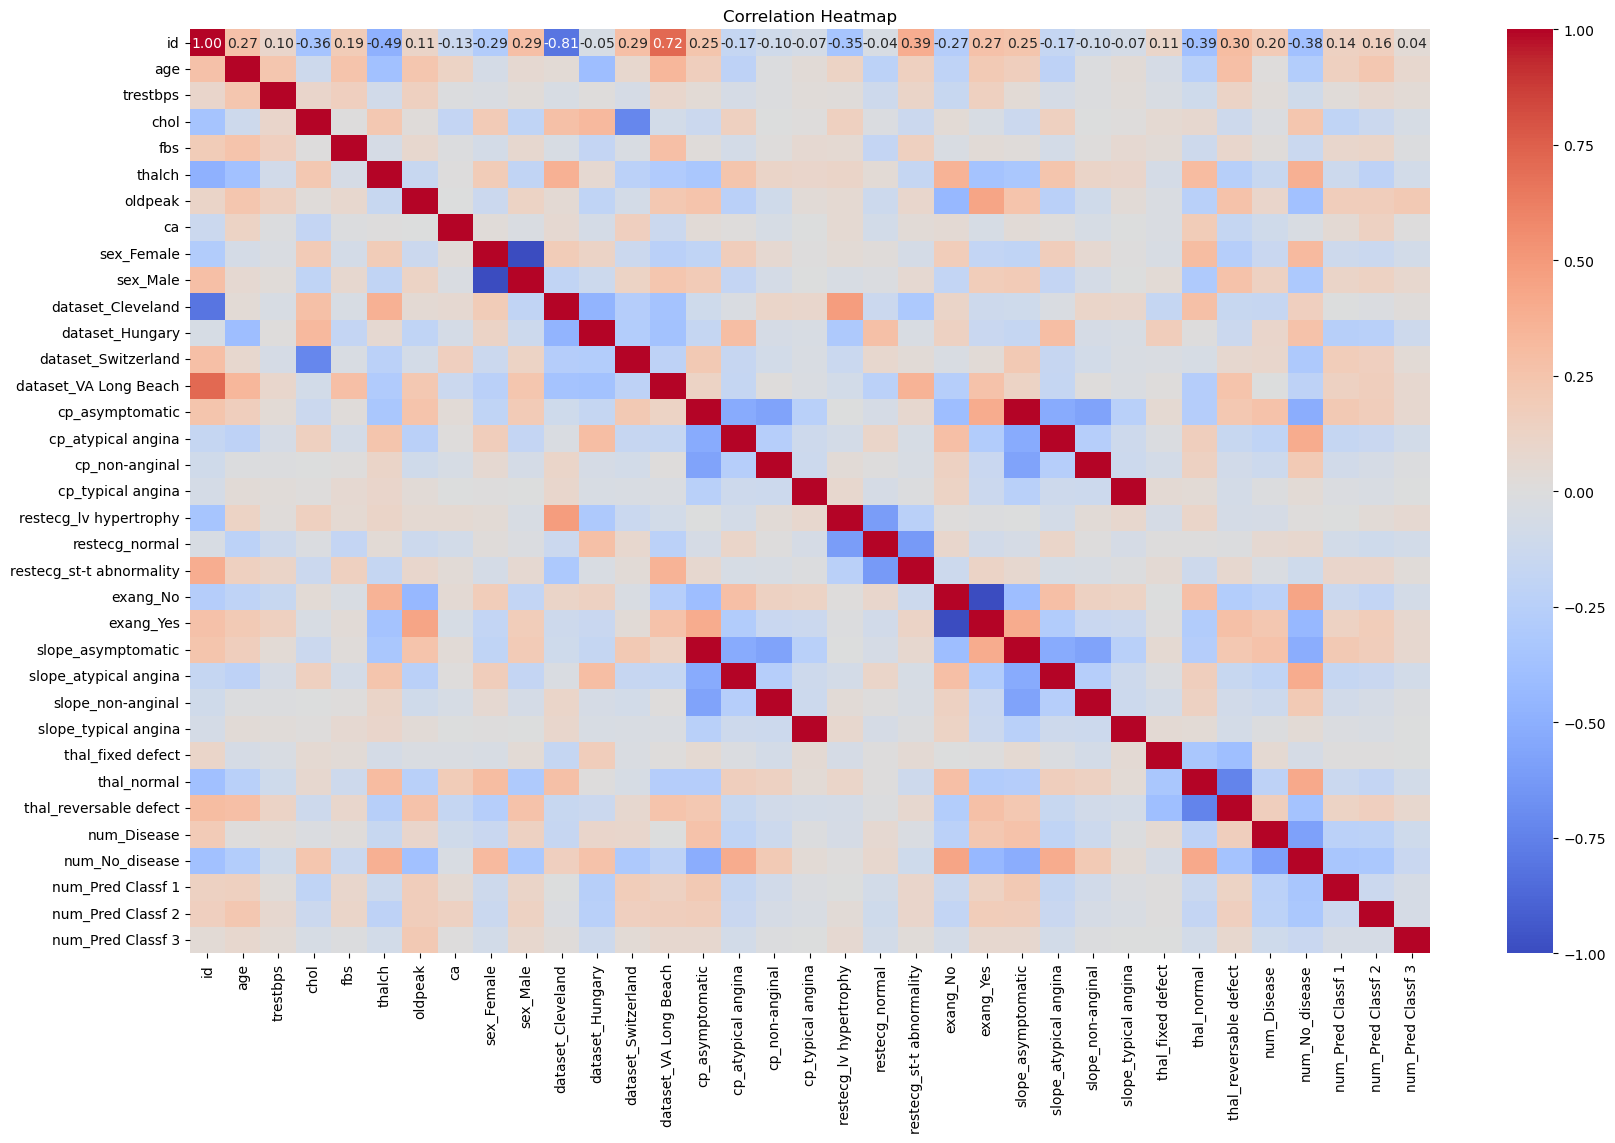

In [219]:
#all columns
# Create a new DataFrame with one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Model Validations

In [220]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,No,2.3,typical angina,0.0,fixed defect,No_disease
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,Yes,2.6,asymptomatic,2.0,reversable defect,Disease
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,No,3.5,non-anginal,0.0,normal,No_disease
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,No,1.4,atypical angina,0.0,normal,No_disease
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,No,0.8,atypical angina,0.0,normal,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,No,0.0,asymptomatic,0.0,normal,Disease
916,917,62,Male,VA Long Beach,typical angina,127.0,139.0,False,st-t abnormality,154.0,No,0.0,typical angina,0.0,normal,No_disease
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,No,0.0,asymptomatic,0.0,fixed defect,Pred Classf 1
918,919,58,Male,VA Long Beach,asymptomatic,122.0,385.0,True,lv hypertrophy,100.0,No,0.0,asymptomatic,0.0,fixed defect,No_disease


<Axes: >

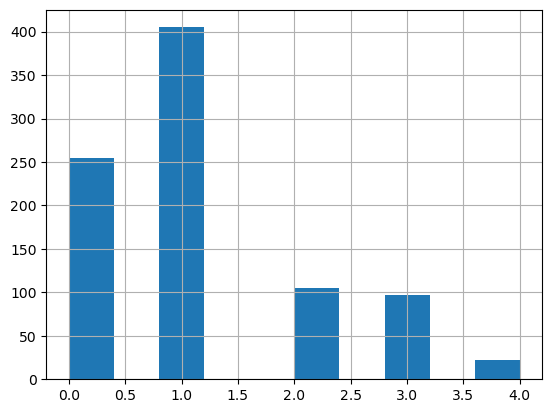

In [236]:
# See distribution of target variable
df['num'].hist()

In [222]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [237]:
# Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
       df[col] = label_encoder.fit_transform(df[col])

In [238]:
# Selecting features
X = df.iloc[:,:-1].values
X

array([[1, 63, 1, ..., 3, 0.0, 0],
       [3, 67, 1, ..., 0, 2.0, 2],
       [4, 37, 1, ..., 2, 0.0, 1],
       ...,
       [918, 55, 1, ..., 0, 0.0, 0],
       [919, 58, 1, ..., 0, 0.0, 0],
       [920, 62, 1, ..., 1, 0.0, 0]], dtype=object)

In [252]:
# Selecting target variable
y = df['num'] == 1
y

0       True
2      False
3       True
4       True
5       True
       ...  
915    False
916     True
917    False
918     True
919    False
Name: num, Length: 884, dtype: bool

In [253]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
# Scale/normalize the training data
scaler = StandardScaler()
scaled_X_trained = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
print("Peak to Peak range by column in Raw X")   
print(np.ptp(X_train,axis=0))
print(f"Peak to Peak range by column in Scaled trained X")
print(np.ptp(scaled_X_trained,axis=0))

Peak to Peak range by column in Raw X
[919 48 1 3 3 105.0 529.0 1 2 142.0 1 5.5 3 2.0 2]
Peak to Peak range by column in Scaled trained X
[3.49060236 5.17647974 2.46414768 2.66144121 3.17381281 5.92626048
 4.8262887  2.65508189 3.17920624 5.39891852 2.03635654 5.33886891
 3.17381281 2.93244894 2.78654366]


In [256]:
# Support Vector Machines Classifier
scv_clf = SVC()
scv_clf.fit(scaled_X_trained, y_train)
scv_clf_predictions = scv_clf.predict(scaled_X_test)
scv_clf_predictions

array([ True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [257]:
def algo_accuracy(y_test, predictions):
	cmatrix = confusion_matrix(y_test, predictions)
	accuracy = accuracy_score(y_test, predictions)
	precision = precision_score(y_test, predictions)
	recall = recall_score(y_test, predictions)
	f1 = f1_score(y_test, predictions)
	roc_score = roc_auc_score(y_test, predictions)

	return cmatrix, accuracy, precision, recall, f1, roc_score

In [258]:
# Support vector machine score
cmatrix, accuracy, precision, recall, f1, roc_score = algo_accuracy(y_test, scv_clf_predictions)

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)
print('F1 score:', f1)
print('ROC Score: ', roc_score)
print(cmatrix)

Accuracy score: 0.8305084745762712
Precision score: 0.9012345679012346
Recall score: 0.7684210526315789
F1 score: 0.8295454545454545
ROC Score:  0.8354300385109114
[[74  8]
 [22 73]]


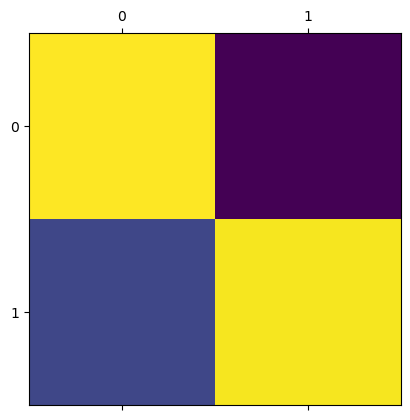

In [259]:
plt.matshow(cmatrix)

Text(0, 0.5, 'True Positive Rate (Recall)')

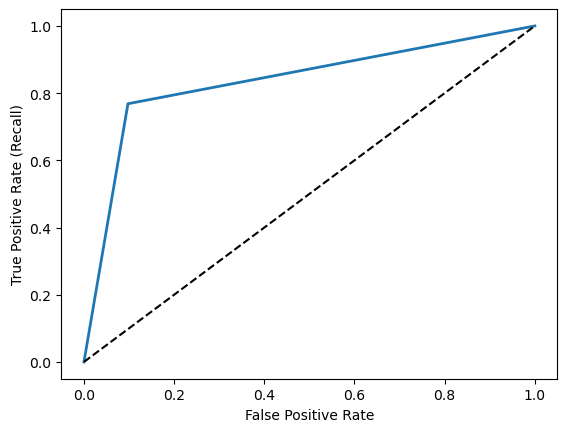

In [260]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, scv_clf_predictions)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

In [261]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_grid = [
	{'n_estimators': [10, 15], 'max_features': [2, 4, 6, 8]},
	{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, params_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(scaled_X_trained, y_train)

rfc_clf = grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=4, n_estimators=15)

In [262]:
rfc_clf_predictions = rfc_clf.predict(scaled_X_test)
rfc_clf_predictions

array([ True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,

In [264]:
# Random forest classifier score
cmatrix, accuracy, precision, recall, f1 = algo_accuracy(y_test, rfc_clf_predictions)
print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)
print('F1 score:', f1)
print('ROC Score: ', roc_score)
print(cmatrix)

ValueError: too many values to unpack (expected 5)

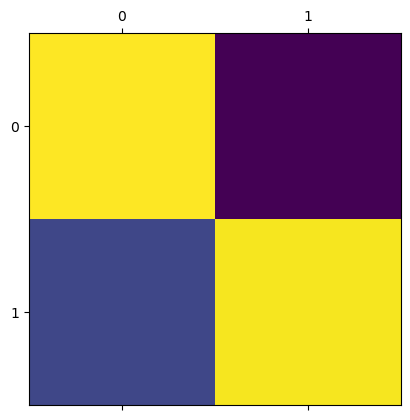

In [265]:
# Matrix plot
plt.matshow(cmatrix)

Text(0, 0.5, 'True Positive Rate (Recall)')

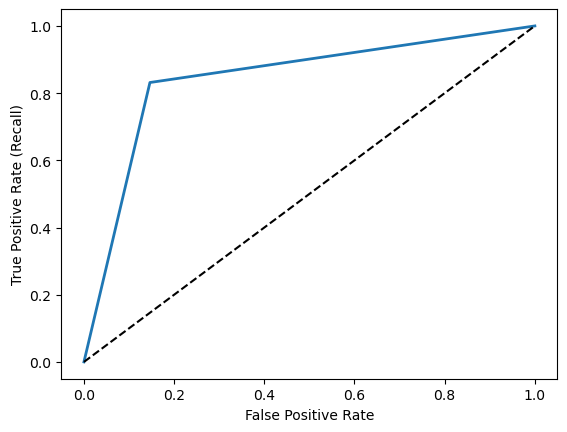

In [266]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc_clf_predictions)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

# Evaluating Models

**1) Which ML model you would choose for this taks?**

- For a binary classification task like predicting whether a person has heart disease or not, Logistic Regression is a commonly used and effective model. It's suitable when the dependent variable is binary, making it appropriate for cases where you want to predict the probability of a positive outcome.

**2) Write the equation for that model**

- The logistic regression equation is givP(Y=1) = 1 / (1 + e^-(β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ))]

**3) Explain the equation written in the previous question and explain all the terms in the dataset (Independent, Dependent, Features, Weights)**

- Dependent Variable (Target): ( Y ) or ( Y=1 ) represents the target variable, which could be binary (0 or 1), indicating the presence or absence of heart disease.

- Independent Variables (Features): ( X_1, X_2, \ldots, X_n ) represent the features from the dataset. These could include variables such as age, gender, chest pain type, etc.

- Weights (Coefficients): ( \beta_0, \beta_1, \ldots, \beta_n ) are the weights or coefficients assigned to each feature. These weights determine the impact of each feature on the log-odds of having heart disease. g heart disease.